## Practical 5: SVM (Kernels)

The objectives of this practical are to learn:
- the core concepts of kernels
- how to choose and use kernels
- how to build a pipeline of an ML task
- how to apply SVMs to solve ML problems
- how to tune the appropriate hyperparameters when using SVMs with Scikit-Learn methods for SVMs

### What are kernels?

When the data points of different classes are not linearly separable in the original low dimensional space, a kernel function/trick can be used to calculate the distance between a pair of data points in a higher dimensional space so that a hyperplane (and decision boundary) can be formed in the higher dimensional space to linealy separate the data.

Note that we don't actually generate the higher dimensional space but we use the kernel function/trick to calculate the distance between a pair of data points in the higher dimensional space.

## Tutorial 1: Polynomial kernels

Note that the polynomial kernel is defined as follows: $k(x^{(i)},x^{(j)})=((x^{(i)})^Tx^{(j)}+r)^d$. Refer to the lecture slides for further details.

In [1]:
# Code adopted from Hands-On Machine Learning with Scikit-Learn and TensorFlow
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### Generate and display a dataset

We first generate a dataset that is not linearly separatable. scikit-learn provides a number of random sample generators (e.g. make_moons() used in this tutorial) in the sklearn.datasets class that can be used to generate datasets of controlled size and complexity. These datasets are particularly useful for illustrations.

For further information about the parameters used in the method, refer to:
https://scikit-learn.org/stable/datasets/sample_generators.html

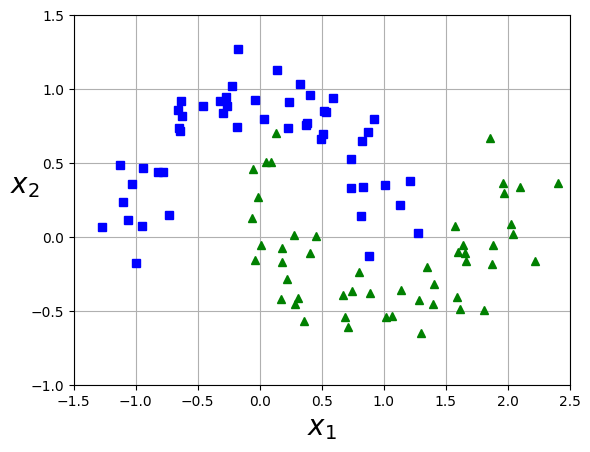

In [2]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

print(X.shape)
print(y.shape)

print(X[:5])
print(y[:5])

# This is a useful method for plotting a dataset for binary classification.
def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:,0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
# Function for plotting an SVM decision bounday

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                    model.support_vectors_[:, 1], 
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Generate and display the decision boundary fitted by a linear kernel

For further information on the SVC method, refer to:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

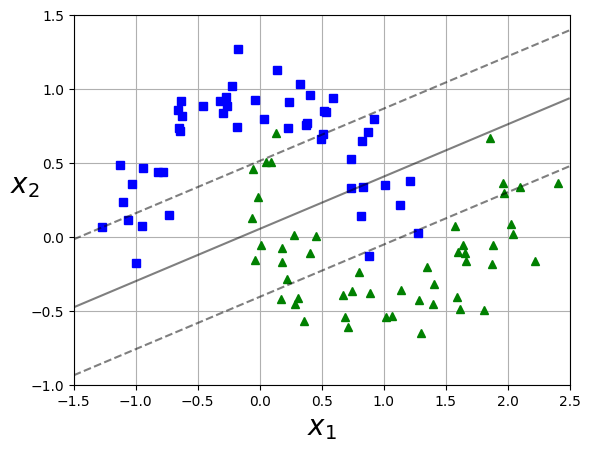

In [4]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
clf = SVC(kernel='linear').fit(X, y)
plot_svc_decision_function(clf, plot_support=False);

As we can see the linear decision boundary is clearly not able to separate the two classes.

### Build a pipeline

SVMs are sensitive to the feature scales. We now build a pipeline to include the the StandardScaler() imported from sklearn.preprocessing class to scale the features before fitting the model.

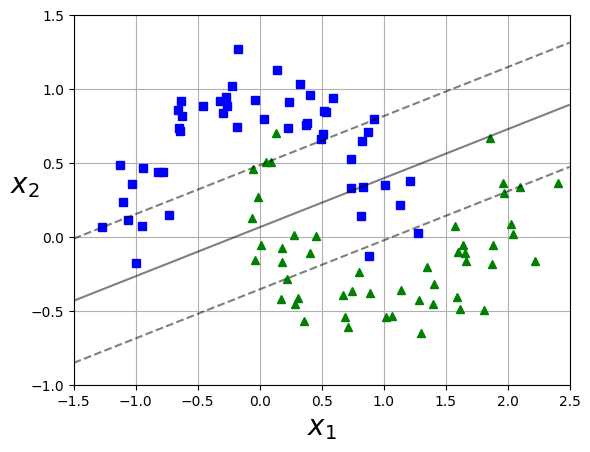

In [5]:
linear_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='linear'))
])

linear_kernel_svm_clf.fit(X, y)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_svc_decision_function(linear_kernel_svm_clf.fit(X, y), plot_support=False)

Again, as we can see the linear decision boundary is clearly not able to separate the two classes.

### Build a linear SVM classifier using additional polynomial features

As we can see above, the data points are clearly not separatable in the original feature space using a linear SVM.

We can form an additional polynomial feature so that the data points can be separated in the new feature space using a linear SVM. In this class the SVM classifier is actually a 2d plane which when projected back to the original feature space shows as a curved road.

For further information on the SVC method, refer to:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [6]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=4, loss='hinge', random_state=42)) # C changed from 10 to 4 in order to converge
])

polynomial_svm_clf.fit(X, y)

c:\Users\Spoon\miniconda3\envs\ML_SK\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=4, loss='hinge', random_state=42))])

### Plot the decision boundary from the fitted model in the polynomial feature space

c:\Users\Spoon\miniconda3\envs\ML_SK\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


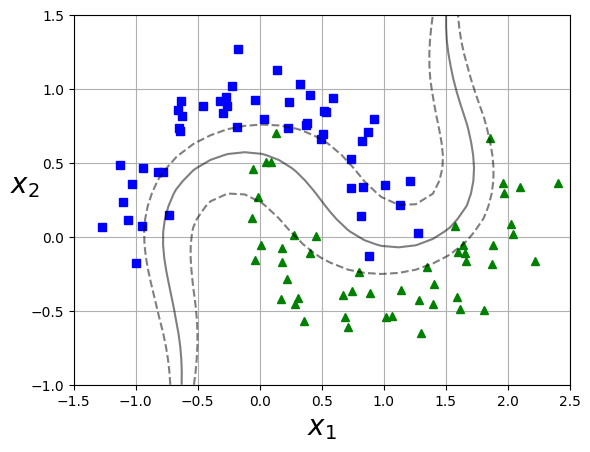

In [7]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_svc_decision_function(polynomial_svm_clf.fit(X, y), plot_support=False)

As we can see a soft margin classifier can be generated in the polynomical feature space.

### Task. 

- Change the value of C in the LinearSVC model to see what happens. Can you compare the plot with the one generated when the value of C is set to 4 to see what the differences between them are? Can you explain why?

### Generate a linear SVM classifier using a polynomial kernel
Instead of creating an additional polynomial feature to form a higher dimensional feature space so that a linear SVM can be fitted, in this class we use a polynomial kernel which uses the polynomial kernel trick and does not need to actually creating the additional polynomial feature.

In this case the SVM classifier is a 2d smooth plane which when projected back to the original feature space shows as a curved road, which is similar to the linear classifier we previously had.

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=4))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=4, coef0=1, kernel='poly'))])

**Note the values of the hyper-parameters, degree $d$, coef0 for $r$ and $C$ for the softness of the classifier.**

Refer to the lecture slides for the definitions of these hyper-parameters.

For further information on the SVC method, refer to:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

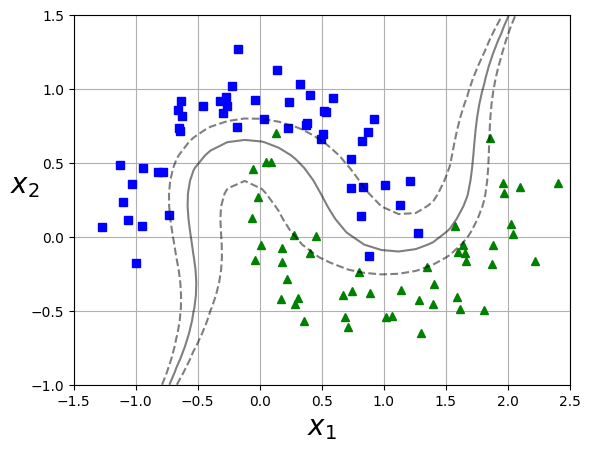

In [9]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_svc_decision_function(poly_kernel_svm_clf.fit(X, y), plot_support=False);

As we can see in the plot, the decision boundary generated by the polynal kernal is a good approximation of the decision boundary generated in the polynomial feature space.

## Tutorial 2: Radial Basis Function (RBF) Kernels

We first generate another dataset that is not linearly separatable.

In [10]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # has this been used?

# use seaborn plotting methods
import seaborn as sns; sns.set()

### Visualise the decision bounday of the model

We first define a function for plotting an SVM decision boundary.

*Note that this is a useful function for plotting an SVM decision boundary.*

In [11]:
# Function for plotting an SVM decision bounday

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                    model.support_vectors_[:, 1], 
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

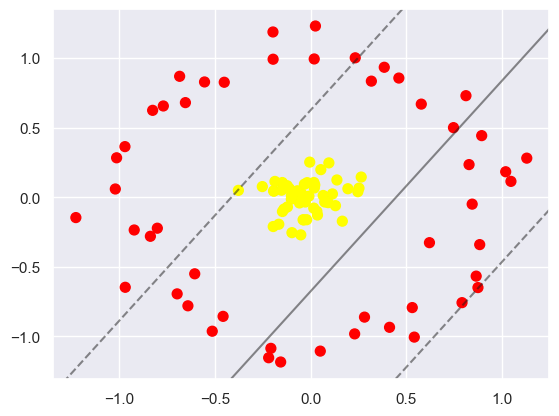

In [12]:
from sklearn.svm import SVC # "Support vector classifier"

X, y = datasets.make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In this case, we have tried to find a linear classifier to separate the data points which the classifier clearly is not be able to.

We now project the data to a higher dimensional space using the radial basis function (RBF) which basically lifting the data points in the middle to bent the 2-d data into 3-d data.

Note that projecting data from a lower dimensional space to a higher dimensional space is to use a function of the variables in the lower dimension space to form an extra dimension in the higher dimensional space.

The other way round, when we project data from a higher dimensional space into a lower dimensional space to assign a constant to a feature variable in one dimension so that the dimensionality can be reduced by 1.

In [13]:
z = np.exp(-(X ** 2).sum(1))

Visualise the data in a 3-d plot after it is projected to the third dimension. 

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D, elev=[-90, 30, 90], azim=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30, 90), value=30), IntSlider(value=…

We can see that with this extra dimension, $z$, the data becomes linearly separatable by a plane at, say, $z=0.7$. When we project the plane back to the original 2-d space, i.e., using $x$ and $y$ values of the plane only, we can draw a circle in the 2-d space to separate the data, i.e., yelow dots from red dots.

This kind of functional transformation is called a kernel transformation. 

However, projecting $M$ data points into $N$ dimensions can become computationally expensive or even not feasible when $N$ grows large or even infinite.

What we actually do in SVM is to use a kernel function called kernel trick to fit a SVM model (i.e. a hyperplane) in the transformed data **implicitly** (i.e. without explicitly transforming the data). Nevertheless, we can fit the SVM model in a high dimensional space as if we fit the model to the transformed data. Use of kernel tricks makes SVM very powerful yet computationally efficient. 

In Scikit-Learn, we can apply a kernelised SVM by choosing a non-linear kernel, e.g. RBF, using the kernel hyperparameter, $\gamma$. Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC for further information.

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

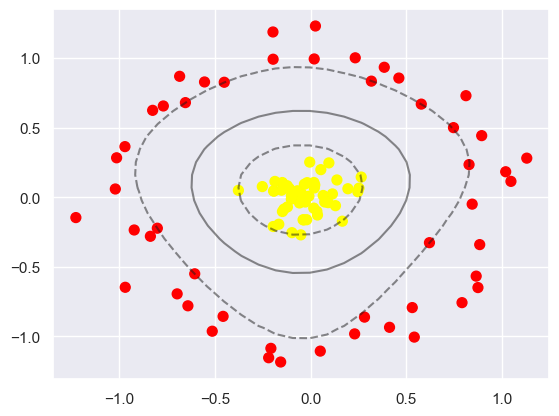

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# a very useful function for plotting the decision boundary projected back from the higher-dimensional space to 
# the lower-dimensional space
plot_svc_decision_function(clf) 
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using the kernelised SVM, we can fit/learn a decision boundary in the high dimensinal space. When we project the decision boundary back to the original/low dimensional space, We can see the projected decision boundary in the 2-d space.

## Exercise.
Try different values of the appropriate hyper-parameters, $\gamma$, $C$ and see what happens.

Refer to the lecture slides for the defintions of these paramters.

For further information on the SVC method, refer to:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC